# One Generation of Topic Data

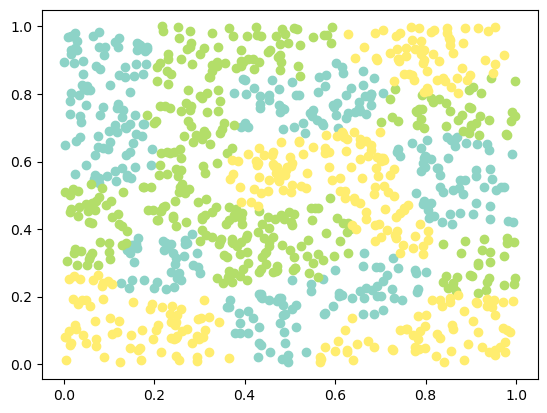

In [1]:
import sys
import os
import time
import numpy as np
from numpy.linalg import norm, svd, solve, qr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import rbf_kernel
import networkx as nx

import scipy
from scipy.sparse import csr_matrix
from scipy.optimize import linear_sum_assignment

import cvxpy as cp
from cvxpy import Variable
from cvxpy.problems.objective import Minimize
from cvxpy.problems.problem import Problem

sys.path.append('./pycvxcluster/src/')
import pycvxcluster.pycvxcluster

from SpLSI import generate_topic_model as gen_model
from SpLSI.utils import *
from SpLSI.spatialSVD import *
from SpLSI import splsi
import utils.spatial_lda.model
from utils.spatial_lda.featurization import make_merged_difference_matrices


N = 100 # doc length
n = 1000 # number of nodes
p = 30 # vocab size
K = 3 # number of topics
r = 0.05 # heterogeneity parameter
m = 5 # number of neighbors to be considered in weights
phi = 0.1 # weight parameter
coord_df, W, A, D = gen_model.generate_data(N, n, p, K, r)
weights, edge_df = gen_model.generate_weights_edge(coord_df, m, phi)

gen_model.plot_scatter(coord_df)

# MST Folds / Matrix Denoising via Iterative Convex Clustering

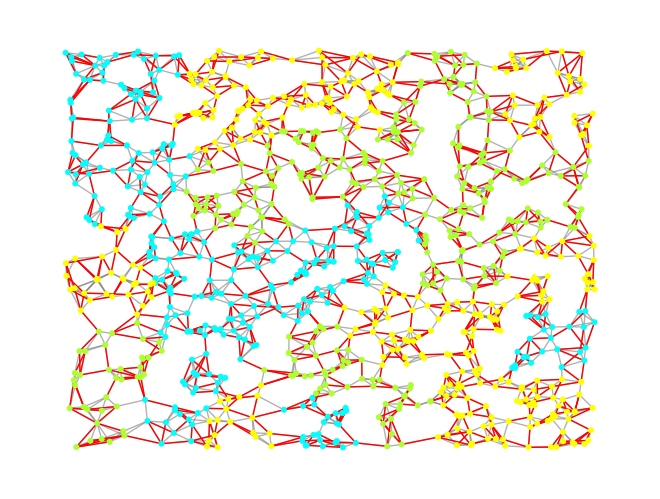

In [3]:
G, mst= get_mst(edge_df)
srn, fold1, fold2 = get_folds(mst)
folds = {0:fold1, 1:fold2}
colors = gen_model.get_colors(coord_df)
colors = [colors[node] for node in G.nodes]

# Plot the random graph
pos_dict = {node: (coord_df['x'][node], coord_df['y'][node]) for node in G.nodes}
nx.set_node_attributes(G, pos_dict, 'pos')
pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, with_labels=False, node_size=10, node_color=colors, edge_color='gray', alpha=0.6)

# Plot the minimum spanning tree in red
nx.draw(mst, pos, with_labels=False, node_size=10, node_color=colors, edge_color='r', alpha=1)

plt.show()

# Simulations

## Simulation results for N=10, 50, 100, 200, 1000 (with CV step 6)

In [ ]:
res = run_simul(N_vals=[5, 10, 50, 100, 1000])

<Axes: xlabel='N', ylabel='err'>

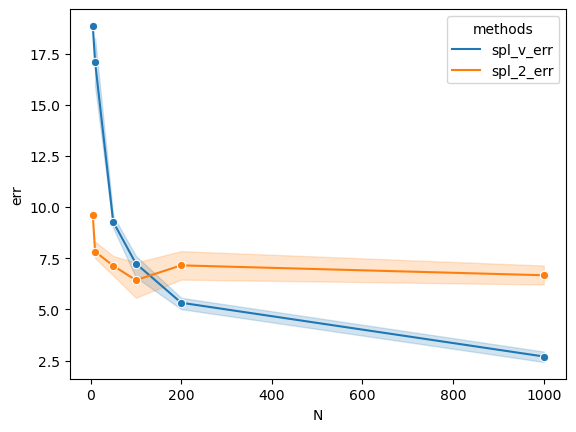

In [ ]:
df_melted = pd.melt(res[['spl_v_err','spl_2_err','N']], id_vars='N', var_name='methods', value_name='err')
sns.lineplot(x='N', y='err', hue = 'methods', data=df_melted, marker='o')

<Axes: xlabel='N', ylabel='acc'>

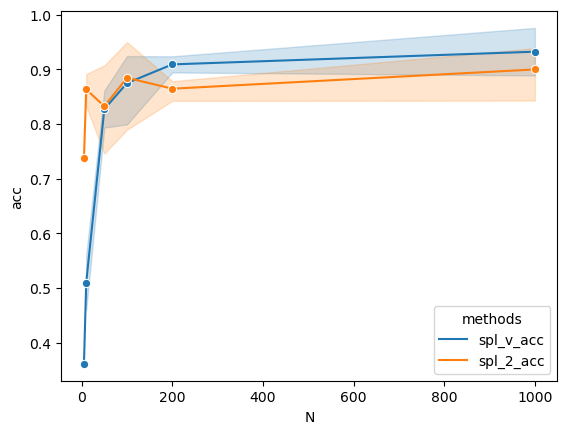

In [ ]:
df_melted = pd.melt(res[['spl_v_acc','spl_2_acc','N']], id_vars='N', var_name='methods', value_name='acc')
sns.lineplot(x='N', y='acc', hue = 'methods', data=df_melted, marker='o')

<Axes: xlabel='N', ylabel='spl_2_lambd'>

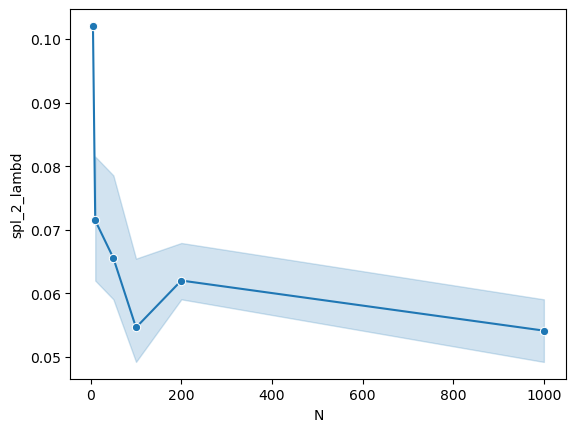

In [ ]:
sns.lineplot(x='N', y='spl_2_lambd', data=res, marker='o')

## Simulation results for N=10, 100, 200 (no CV step, fixed lambda)

In [ ]:
lamb_start=0.0001
step_size=1.2
grid_len=50
lambd_grid = (lamb_start*np.power(step_size, np.arange(grid_len))).tolist()
lambd_grid.insert(0, 1e-06)

results_10 = run_simul_fixed_lambda(nsim = 5, lambd_grid=lambd_grid, N = 10)
results_100 = run_simul_fixed_lambda(nsim = 5, lambd_grid=lambd_grid, N = 100)
results_200 = run_simul_fixed_lambda(nsim = 5, lambd_grid=lambd_grid, N = 200)

[Text(0.5, 1.0, 'N=200')]

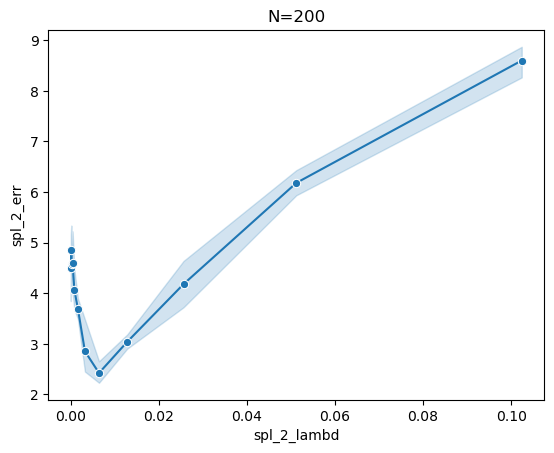

In [21]:
sns.lineplot(x='spl_2_lambd', y='spl_2_err', data=results_200, marker='o').set(title='N=200')

[Text(0.5, 1.0, 'N=100')]

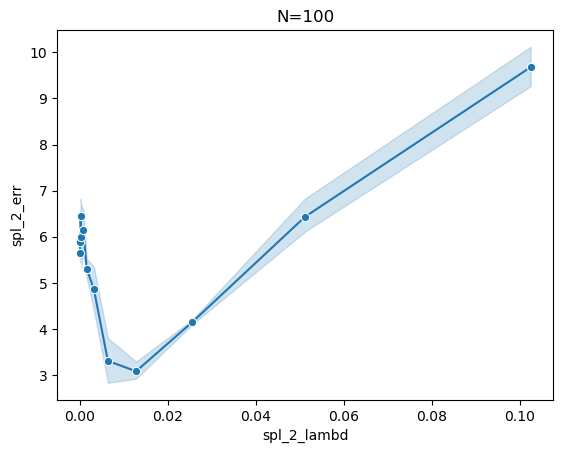

In [27]:
sns.lineplot(x='spl_2_lambd', y='spl_2_err', data=results_100, marker='o').set(title='N=100')

[Text(0.5, 1.0, 'N=10')]

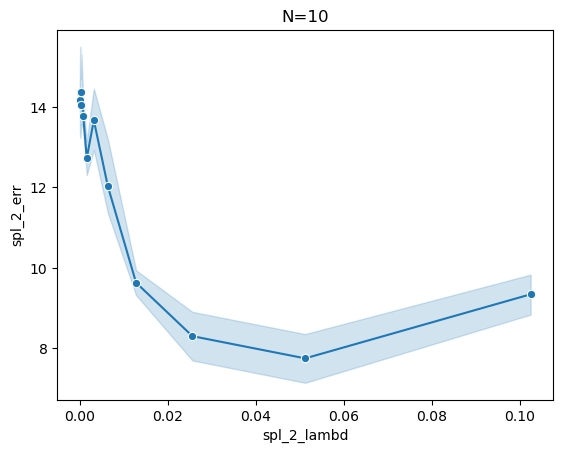

In [24]:
sns.lineplot(x='spl_2_lambd', y='spl_2_err', data=results_10, marker='o').set(title='N=10')